In [1]:
import datetime
import pandas as pd
import numpy as np

from pybaseball import schedule_and_record, batting_stats, pitching_stats


import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
%matplotlib inline

#-----
# set styles

mpl.rcParams['font.family'] = ['sans-serif']
mpl.rcParams['xtick.labelsize'] = 17
mpl.rcParams['ytick.labelsize'] = 17
mpl.rcParams['lines.linewidth'] = 2

mpl.rcParams['pdf.fonttype'] = 42 # allegedly allows text to be saved as editable

mpl.rcParams['font.sans-serif'] = ['Arial Narrow']
mpl.rcParams['font.size'] = 9
mpl.rcParams['text.usetex'] = False
mpl.rcParams['svg.fonttype'] = 'none'

import warnings
warnings.filterwarnings("ignore")

plt.style.use(['ggplot'])
# prints list of available seaborn styles
#print(plt.style.available)

from scipy.stats import norm

print('ready')

ready


In [3]:
data=batting_stats(2018)
data.dtypes

Season             float64
Name                object
Team                object
Age                float64
G                  float64
AB                 float64
PA                 float64
H                  float64
1B                 float64
2B                 float64
3B                 float64
HR                 float64
R                  float64
RBI                float64
BB                 float64
IBB                float64
SO                 float64
HBP                float64
SF                 float64
SH                 float64
GDP                float64
SB                 float64
CS                 float64
AVG                float64
GB                 float64
FB                 float64
LD                 float64
IFFB               float64
Pitches            float64
Balls              float64
                    ...   
wCH (pi)           float64
wCS (pi)           float64
wCU (pi)           float64
wFA (pi)           float64
wFC (pi)           float64
wFS (pi)           float64
w

In [2]:
sox = pd.read_csv('csv/soxpitch.csv', index_col=None)
sox.head(3)

,posName,posnum,lastname,position,status_code,bats,throws,Name,Team,W,...,SIperc,SLperc,CUperc,KCperc,EPperc,CHperc,SCperc,KNperc,UNperc,avgIP
0,Manny Banuelos,58,Banuelos,P,A,R,L,Manny Banuelos,White Sox,0,...,57.1,38.1,4.8,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,Ryan Burr,61,Burr,P,A,R,R,Ryan Burr,White Sox,0,...,NaN,18.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5
2,Alex Colome,48,Colome,P,A,R,R,Alex Colome,White Sox,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [3]:
sox.dtypes

posName         object
posnum           int64
lastname        object
position        object
status_code     object
bats            object
throws          object
Name            object
Team            object
W                int64
L                int64
ERA            float64
WAR            float64
G                int64
GS               int64
CG               int64
ShO              int64
SV               int64
BS               int64
IP             float64
H                int64
R                int64
ER               int64
HR               int64
BB               int64
HBP              int64
WP               int64
BK               int64
SO               int64
IFFB           float64
                ...   
Strikes          int64
Pitches          int64
RS             float64
AVG            float64
WHIP           float64
BABIP          float64
FIP            float64
WPA            float64
RAR            float64
K9             float64
BB9            float64
Kperc          float64
BBperc     

In [4]:
d = {'pitches': ['Fastball','FS-2S','Cutter','Split','Fork', 'Sinker', 'Slider', 'Curve','Ephesus','Change','Screw','Knuckle','Knu-Curve','Unknown']}
df = pd.DataFrame(data=d)
df['perc'] = [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]

df

,pitches,perc
0,Fastball,0.0
1,FS-2S,0.0
2,Cutter,0.0
3,Split,0.0
4,Fork,0.0
5,Sinker,0.0
6,Slider,0.0
7,Curve,0.0
8,Ephesus,0.0
9,Change,0.0


In [5]:
if ( sox['Pitches'][0] == 0):
    junkvar = []
else:
    df['perc'][0] = sox['FAperc'][0]
    df['perc'][1] = sox['FTperc'][0]
    df['perc'][2] = sox['FCperc'][0]
    df['perc'][3] = sox['FSperc'][0]
    df['perc'][4] = sox['FOperc'][0]
    df['perc'][5] = sox['SIperc'][0]
    df['perc'][6] = sox['SLperc'][0]
    df['perc'][7] = sox['CUperc'][0]
    df['perc'][8] = sox['EPperc'][0]
    df['perc'][9] = sox['CHperc'][0]
    df['perc'][10] = sox['SCperc'][0]
    df['perc'][11] = sox['KNperc'][0]
    df['perc'][12] = sox['KCperc'][0]
    df['perc'][13] = sox['UNperc'][0]

df = df.fillna(value=0)
df

,pitches,perc
0,Fastball,0.0
1,FS-2S,0.0
2,Cutter,0.0
3,Split,0.0
4,Fork,0.0
5,Sinker,57.1
6,Slider,38.1
7,Curve,4.8
8,Ephesus,0.0
9,Change,0.0


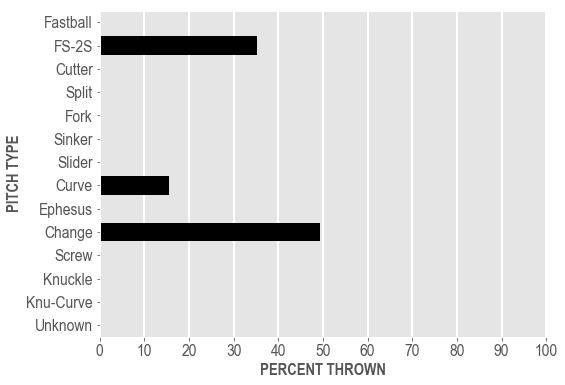

In [18]:
# bar plot
plt.figure()
my_dpi=150
plt.xlim(0, 100)
from matplotlib import ticker
tick_locator = ticker.MaxNLocator(10)
g = sns.barplot(
    x='perc',
    y='pitches',
    data=df,
    color="black"
)
g.xaxis.set_major_locator(tick_locator)
g.grid(axis='x', linewidth=2)
g.figure.set_size_inches(8,6)
g.set_xlabel('PERCENT THROWN', fontsize=16, fontweight='bold')
g.set_ylabel('PITCH TYPE', fontsize=16, fontweight='bold')

#g.figure.savefig('static/img/HR.png',bbox_inches='tight')


Sox pitching charts done


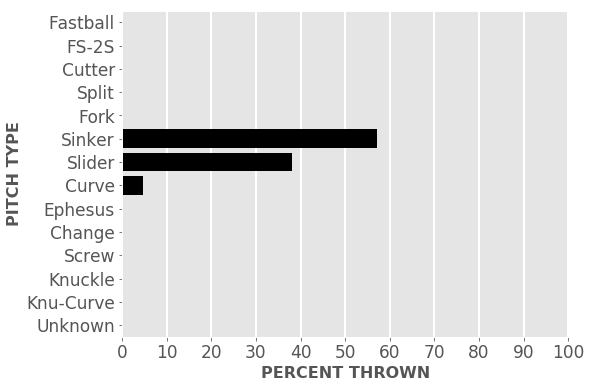

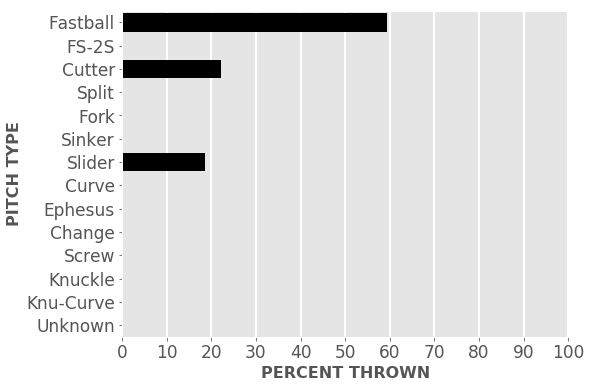

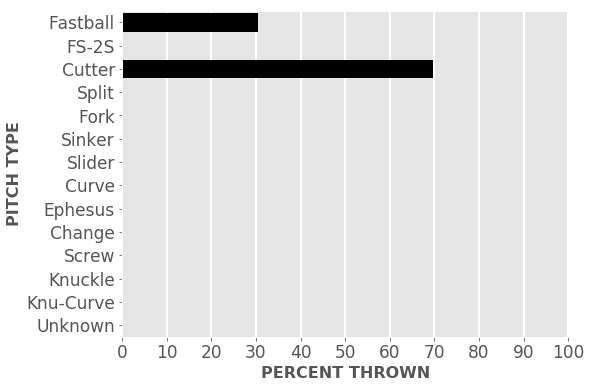

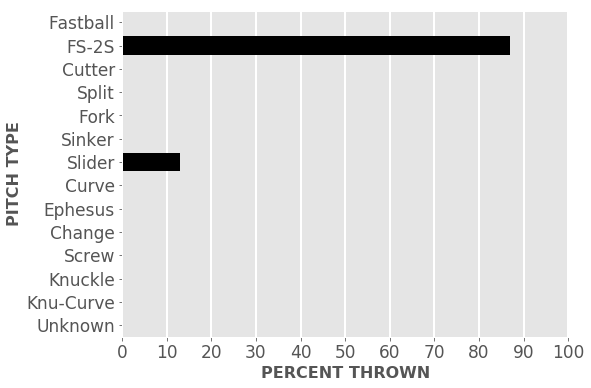

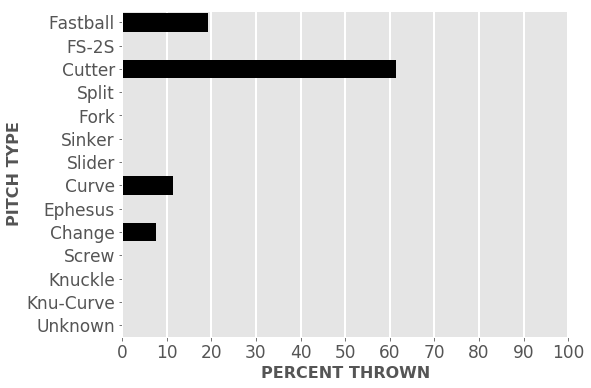

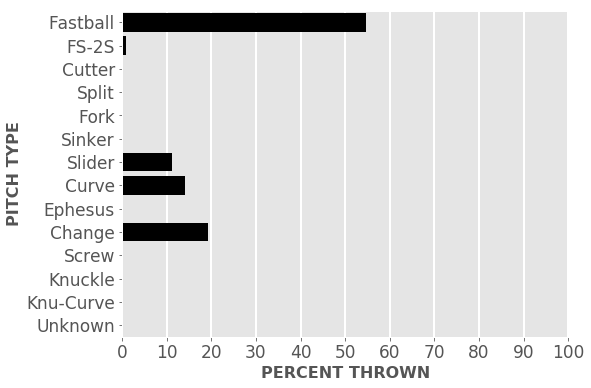

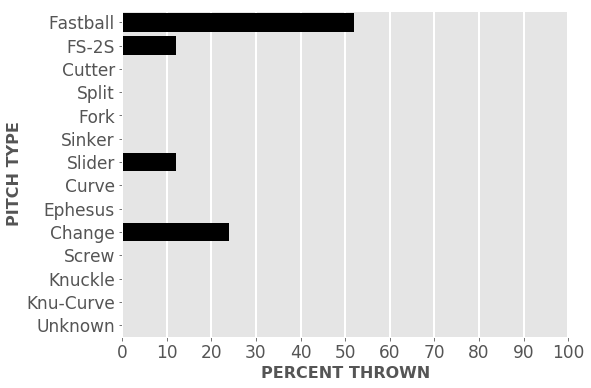

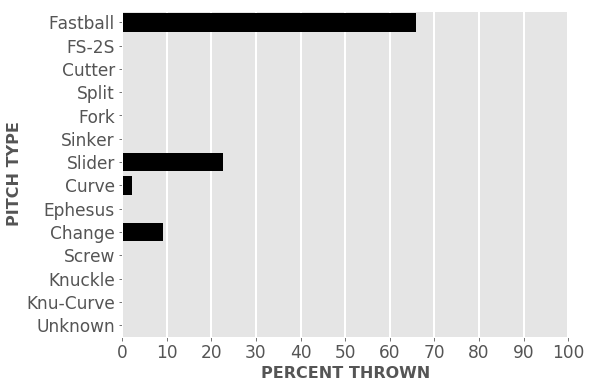

In [ ]:
# begin Sox hitting charts

for index, row in sox.iterrows():
    d = {'pitches': ['Fastball','FS-2S','Cutter','Split','Fork', 'Sinker', 'Slider', 'Curve','Ephesus','Change','Screw','Knuckle','Knu-Curve','Unknown']}
    df = pd.DataFrame(data=d)
    df['perc'] = [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
    if ( row.Pitches == 0):
        junkvar = []
    else:
        df['perc'][0] = row.FAperc
        df['perc'][1] = row.FTperc
        df['perc'][2] = row.FCperc
        df['perc'][3] = row.FSperc
        df['perc'][4] = row.FOperc
        df['perc'][5] = row.SIperc
        df['perc'][6] = row.SLperc
        df['perc'][7] = row.CUperc
        df['perc'][8] = row.EPperc
        df['perc'][9] = row.CHperc
        df['perc'][10] = row.SCperc
        df['perc'][11] = row.KNperc
        df['perc'][12] = row.KCperc
        df['perc'][13] = row.UNperc

    df = df.fillna(value=0)
    # start the plot
    plt.figure()
    my_dpi=150
    plt.xlim(0, 100)
    from matplotlib import ticker
    tick_locator = ticker.MaxNLocator(10)
    g = sns.barplot(
        x='perc',
        y='pitches',
        data=df,
        color="black"
    )
    g.xaxis.set_major_locator(tick_locator)
    g.grid(axis='x', linewidth=2)
    g.figure.set_size_inches(8,6)
    g.set_xlabel('PERCENT THROWN', fontsize=16, fontweight='bold')
    g.set_ylabel('PITCH TYPE', fontsize=16, fontweight='bold')
    #g.figure.savefig('static/img/soxpitch' + str( row.lastname ) + str( row.posnum ) + '.png',bbox_inches='tight')
print('Sox pitching charts done')

In [6]:
pd.__version__

'0.22.0'

In [7]:
battingstats = batting_stats(2018)
BSselect = battingstats[['Name','Team','AB','R','H','2B','3B','HR','RBI','BB','SO','SB','CS','AVG','OBP','SLG','wOBA','wRAA','RAR','WAR','Fld']]
BSselect = BSselect.copy()
BSselect.loc[:,'SOperc'] = np.round( (BSselect['SO'] / BSselect['AB'] )*100,1 )
BSselect = BSselect.rename(columns = {'2B':'dbls','3B':'trps' })
BSselect.dtypes

Name       object
Team       object
AB        float64
R         float64
H         float64
dbls      float64
trps      float64
HR        float64
RBI       float64
BB        float64
SO        float64
SB        float64
CS        float64
AVG       float64
OBP       float64
SLG       float64
wOBA      float64
wRAA      float64
RAR       float64
WAR       float64
Fld       float64
SOperc    float64
dtype: object

In [8]:
BSselect.loc[:, 'AB'] = BSselect['AB'].astype(int)
BSselect.loc[:, 'R'] = BSselect['R'].astype(int)
BSselect.dtypes

Name       object
Team       object
AB          int64
R           int64
H         float64
dbls      float64
trps      float64
HR        float64
RBI       float64
BB        float64
SO        float64
SB        float64
CS        float64
AVG       float64
OBP       float64
SLG       float64
wOBA      float64
wRAA      float64
RAR       float64
WAR       float64
Fld       float64
SOperc    float64
dtype: object

In [9]:
CHCroster = pd.read_csv('csv/CHCroster.csv', index_col=None)
left = CHCroster
right = BSselect
cubsBShit = pd.merge(left, right, how='left', left_on='posName', right_on='Name', suffixes=('_x', '_y'))
cubsBShit.dtypes

posName         object
posnum           int64
lastname        object
position        object
status_code     object
bats            object
throws          object
Name            object
Team            object
AB             float64
R              float64
H              float64
dbls           float64
trps           float64
HR             float64
RBI            float64
BB             float64
SO             float64
SB             float64
CS             float64
AVG            float64
OBP            float64
SLG            float64
wOBA           float64
wRAA           float64
RAR            float64
WAR            float64
Fld            float64
SOperc         float64
dtype: object

In [10]:
cubsBShit.head(25)

,posName,posnum,lastname,position,status_code,bats,throws,Name,Team,AB,...,CS,AVG,OBP,SLG,wOBA,wRAA,RAR,WAR,Fld,SOperc
0,Albert Almora Jr.,5,Almora,CF,A,R,R,Albert Almora Jr.,Cubs,49.0,...,0.0,0.327,0.377,0.510,0.387,3.0,5.5,0.6,0.7,18.4
1,Javier Baez,9,Baez,2B,A,R,R,Javier Baez,Cubs,72.0,...,0.0,0.292,0.363,0.736,0.447,8.4,11.5,1.2,-0.2,23.6
2,David Bote,13,Bote,2B,A,R,R,David Bote,Cubs,5.0,...,1.0,0.200,0.200,0.400,0.254,-0.2,-0.5,0.0,NaN,60.0
3,Kris Bryant,17,Bryant,3B,A,R,R,Kris Bryant,Cubs,69.0,...,1.0,0.319,0.467,0.536,0.434,8.5,10.3,1.1,-0.1,17.4
4,Eddie Butler,33,Butler,P,D10,R,R,Eddie Butler,Cubs,2.0,...,0.0,0.000,0.333,0.000,0.232,-0.2,0.2,0.0,NaN,0.0
5,Victor Caratini,7,Caratini,C,A,S,R,Victor Caratini,Cubs,32.0,...,0.0,0.250,0.314,0.344,0.297,-0.5,1.0,0.1,0.0,28.1
6,Tyler Chatwood,21,Chatwood,P,A,R,R,Tyler Chatwood,Cubs,4.0,...,0.0,0.000,0.000,0.000,0.000,-1.2,-0.5,-0.1,NaN,25.0
7,Steve Cishek,41,Cishek,P,A,R,R,Steve Cishek,Cubs,2.0,...,0.0,0.500,0.500,0.500,0.446,0.2,0.5,0.1,NaN,0.0
8,Willson Contreras,40,Contreras,C,A,R,R,Willson Contreras,Cubs,69.0,...,0.0,0.275,0.359,0.406,0.338,1.5,3.7,0.4,0.7,21.7
9,Yu Darvish,11,Darvish,P,A,R,R,Yu Darvish,Cubs,6.0,...,0.0,0.000,0.000,0.000,0.000,-1.7,-0.7,-0.1,NaN,83.3


In [6]:
testselect = BSselect[['Name','Team','AB','R']]
testselect.dtypes

Name    object
Team    object
AB       int64
R        int64
dtype: object

In [7]:
testselect = testselect.copy()
testselect.dtypes

Name    object
Team    object
AB       int64
R        int64
dtype: object

In [2]:
data = pitching_stats(2018)


,Season,Name,Team,Age,W,L,ERA,WAR,G,GS,...,wSL/C (pi),wXX/C (pi),O-Swing% (pi),Z-Swing% (pi),Swing% (pi),O-Contact% (pi),Z-Contact% (pi),Contact% (pi),Zone% (pi),Pace (pi)
85,2018.0,Reynaldo Lopez,White Sox,24.0,0.0,2.0,1.42,0.3,3.0,3.0,...,6.85,NaN,0.200,0.662,0.436,0.483,0.810,0.736,0.510,24.4
77,2018.0,Nate Jones,White Sox,32.0,1.0,0.0,1.35,0.2,6.0,0.0,...,1.79,NaN,0.327,0.661,0.500,0.278,0.846,0.667,0.518,24.5
316,2018.0,Lucas Giolito,White Sox,23.0,0.0,2.0,5.50,0.2,3.0,3.0,...,-0.61,NaN,0.206,0.635,0.395,0.636,0.863,0.797,0.441,26.8
377,2018.0,Aaron Bummer,White Sox,24.0,0.0,0.0,7.20,0.2,9.0,0.0,...,-9.37,NaN,0.391,0.667,0.519,0.630,0.850,0.761,0.465,23.6
165,2018.0,Bruce Rondon,White Sox,27.0,1.0,0.0,2.84,0.1,4.0,0.0,...,6.08,NaN,0.355,0.638,0.477,0.409,0.800,0.635,0.431,23.8
261,2018.0,James Shields,White Sox,36.0,1.0,1.0,4.50,0.1,4.0,3.0,...,-5.58,NaN,0.297,0.653,0.437,0.684,0.852,0.783,0.392,24.6
252,2018.0,Joakim Soria,White Sox,34.0,0.0,0.0,4.50,0.1,6.0,0.0,...,-0.31,NaN,0.257,0.688,0.426,0.474,0.818,0.692,0.393,25.7
210,2018.0,Danny Farquhar,White Sox,31.0,1.0,1.0,3.68,0.0,7.0,0.0,...,NaN,NaN,0.426,0.767,0.567,0.539,0.849,0.712,0.414,20.6
226,2018.0,Hector Santiago,White Sox,30.0,0.0,0.0,3.86,0.0,5.0,0.0,...,-4.48,NaN,0.168,0.640,0.415,0.706,0.789,0.773,0.524,25.6
331,2018.0,Chris Volstad,White Sox,31.0,0.0,0.0,5.79,0.0,3.0,0.0,...,NaN,NaN,0.147,0.510,0.361,0.800,0.840,0.833,0.590,20.8


In [4]:
soxPS = pd.DataFrame( data.loc[ ( data["Team"] == "White Sox") ] )
soxPSselect = soxPS[['Name','W','L','ERA','WAR','G','GS','CG','ShO','SV','BS','IP','H','R','ER','HR','BB','WP','BK','SO','IFFB','Balls','Strikes','Pitches','RS','AVG','WHIP','BABIP','FIP','WPA','RAR']]
soxPSselect.to_csv("csv/soxpitch.csv", index=False, encoding="utf-8")
soxPSselect.head(3)

,Name,W,L,ERA,WAR,G,GS,CG,ShO,SV,...,Balls,Strikes,Pitches,RS,AVG,WHIP,BABIP,FIP,WPA,RAR
85,Reynaldo Lopez,0.0,2.0,1.42,0.3,3.0,3.0,0.0,0.0,0.0,...,117.0,180.0,297.0,2.0,0.127,1.00,0.150,4.03,0.50,2.7
77,Nate Jones,1.0,0.0,1.35,0.2,6.0,0.0,0.0,0.0,1.0,...,39.0,67.0,106.0,2.0,0.174,1.20,0.286,2.23,0.64,1.7
316,Lucas Giolito,0.0,2.0,5.50,0.2,3.0,3.0,0.0,0.0,0.0,...,129.0,157.0,286.0,1.0,0.200,1.39,0.228,4.91,-0.23,1.6


In [5]:
cubsPS = pd.DataFrame( data.loc[ ( data["Team"] == "Cubs") ] )
cubsPSselect = cubsPS[['Name','W','L','ERA','WAR','G','GS','CG','ShO','SV','BS','IP','H','R','ER','HR','BB','WP','BK','SO','IFFB','Balls','Strikes','Pitches','RS','AVG','WHIP','BABIP','FIP','WPA','RAR']]
cubsPSselect.to_csv("csv/cubspitch.csv", index=False, encoding="utf-8")
cubsPSselect.head(3)

,Name,W,L,ERA,WAR,G,GS,CG,ShO,SV,...,Balls,Strikes,Pitches,RS,AVG,WHIP,BABIP,FIP,WPA,RAR
61,Carl Edwards Jr.,0.0,0.0,1.0,0.4,9.0,0.0,0.0,0.0,0.0,...,62.0,97.0,159.0,1.0,0.182,1.11,0.400,0.47,0.52,3.6
183,Jon Lester,2.0,0.0,3.1,0.3,4.0,4.0,0.0,0.0,0.0,...,123.0,229.0,352.0,22.0,0.244,1.33,0.305,3.48,-0.19,3.0
14,Brandon Morrow,0.0,0.0,0.0,0.2,7.0,0.0,0.0,0.0,3.0,...,33.0,64.0,97.0,0.0,0.100,0.67,0.143,2.13,-0.22,1.5


In [4]:
pitchstats = pitching_stats(2018)
# start Sox pitching stats 
soxPS = pd.DataFrame( pitchstats.loc[ ( pitchstats["Team"] == "White Sox") ] )
soxPSselect = soxPS[['Name','W','L','ERA','WAR','G','GS','CG','ShO','SV','BS','IP','H','R','ER','HR','BB','WP','BK','SO','IFFB','Balls','Strikes','Pitches','RS','AVG','WHIP','BABIP','FIP','WPA','RAR']]
soxPSselect = soxPSselect.copy()
soxPSselect['lastname'] = soxPSselect['Name'].str.split(' ').str[1]
soxPSselect.loc[:, 'W'] = soxPSselect['W'].astype(int)
soxPSselect.loc[:, 'L'] = soxPSselect['L'].astype(int)
soxPSselect.loc[:, 'G'] = soxPSselect['G'].astype(int)
soxPSselect.loc[:, 'GS'] = soxPSselect['GS'].astype(int)
soxPSselect.loc[:, 'CG'] = soxPSselect['CG'].astype(int)
soxPSselect.loc[:, 'ShO'] = soxPSselect['ShO'].astype(int)
soxPSselect.loc[:, 'SV'] = soxPSselect['SV'].astype(int)
soxPSselect.loc[:, 'BS'] = soxPSselect['BS'].astype(int)
soxPSselect.loc[:, 'avgIP'] = soxPSselect['IP'] / soxPSselect['G']
soxPSselect.loc[:, 'H'] = soxPSselect['H'].astype(int)
soxPSselect.loc[:, 'R'] = soxPSselect['R'].astype(int)
soxPSselect.loc[:, 'ER'] = soxPSselect['ER'].astype(int)
soxroster = pd.read_csv('csv/soxroster.csv', index_col=None)
left = soxPSselect
right = soxroster
soxPShit = pd.merge(left, right, how='left', left_on='Name', right_on='posName', suffixes=('_x', '_y'))
soxPShit.loc[:, 'posnum'] = soxPShit['posnum'].astype(int).astype(str)
soxPShit.to_csv("csv/soxpitch.csv", index=False, encoding="utf-8")
print("Sox pitching stats done")

Sox pitching stats done


In [3]:
soxPS.to_csv("csv/soxpitch.csv", index=False, encoding="utf-8")


In [2]:
soxhit = pd.read_csv('csv/soxhit.csv', index_col=None)


In [3]:
soxhit.head()

,posName,posnum,lastname,position,status_code,bats,throws,Name,Team,AB,...,CS,AVG,OBP,SLG,wOBA,wRAA,RAR,WAR,Fld,SOperc
0,Jose Abreu,79,Abreu,1B,A,R,R,Jose Abreu,White Sox,73,...,0,0.274,0.346,0.479,0.364,3.2,2.5,0.3,-0.5,17.8
1,Tim Anderson,7,Anderson,SS,A,R,R,Tim Anderson,White Sox,67,...,0,0.239,0.311,0.403,0.317,0.2,4.6,0.5,-0.7,25.4
2,Welington Castillo,21,Castillo,C,A,R,R,Welington Castillo,White Sox,43,...,0,0.233,0.313,0.442,0.333,0.7,1.0,0.1,-1.0,30.2
3,Matt Davidson,24,Davidson,DH,A,R,R,Matt Davidson,White Sox,58,...,0,0.207,0.352,0.500,0.373,3.3,3.1,0.3,NaN,41.4
4,Adam Engel,15,Engel,CF,A,R,R,Adam Engel,White Sox,45,...,0,0.156,0.250,0.178,0.208,-4.4,-4.4,-0.5,-2.0,31.1


In [ ]:
for index, row in soxhit.iterrows():
    d = {'hits': ['WALKS','SO','HITS','1B', '2B', '3B', 'HR']}
    df = pd.DataFrame(data=d)
    df['hitperc'] = [0.0,0.0,0.0,0.0,0.0,0.0,0.0]
    if ( row.H == 0):
        junkvar = []
    else:
        df['hitperc'][0] = np.round( (row.BB / row.AB)*100,1 )
        df['hitperc'][1] = np.round( (row.SO / row.AB)*100,1 )
        df['hitperc'][2] = np.round( (row.H / row.AB)*100,1 )
        onebs = row.H - ( row.dbls + row.trps + row.HR )
        df['hitperc'][3] = np.round( (onebs / row.H)*100,1 )
        df['hitperc'][4] = np.round( (row.dbls / row.H)*100,1 )
        df['hitperc'][5] = np.round( (row.trps / row.H)*100,1 )
        df['hitperc'][6] = np.round( (row.HR / row.H)*100,1 )
    # start the plot
    plt.figure()
    my_dpi=150
    plt.ylim(0, 100)
    g = sns.barplot(
        x='hits',
        y='hitperc',
        data=df,
        color="black"
    )
    g.figure.set_size_inches(8,6)
    plt.plot([2.5, 2.5], [0, 100], linewidth=2)
    # Add labels to the plot
    style = dict(fontsize=18, family='Arial', fontweight='bold', color='black')
    plt.text(0, 89, "As % of AB", **style)
    plt.text(3, 89, "As % of hits", **style)
    g.set_ylabel('% of AT BATS | HITS', fontsize=16, fontweight='bold')
    g.set_xlabel('AT-BAT RESULTS | HIT TYPE', fontsize=16, fontweight='bold')
    #g.figure.savefig('static/img/sox' + str( row.lastname ) + str( row.posnum ) + '.png',bbox_inches='tight')

#print('done')

In [4]:
d = {'hits': ['WALKS','SO','HITS','1B', '2B', '3B', 'HR']}
df = pd.DataFrame(data=d)
df['hitperc'] = [0.0,0.0,0.0,0.0,0.0,0.0,0.0]

df

,hits,hitperc
0,WALKS,0.0
1,SO,0.0
2,HITS,0.0
3,1B,0.0
4,2B,0.0
5,3B,0.0
6,HR,0.0


In [5]:
if ( soxhit['H'][0] == 0):
    junkvar = []
else:
    df['hitperc'][0] = np.round( (soxhit['BB'][0] / soxhit['AB'][0])*100,1 )
    df['hitperc'][1] = np.round( (soxhit['SO'][0] / soxhit['AB'][0])*100,1 )
    df['hitperc'][2] = np.round( (soxhit['H'][0] / soxhit['AB'][0])*100,1 )
    onebs = soxhit['H'][0] - ( soxhit['dbls'][0] + soxhit['trps'][0] + soxhit['HR'][0] )
    df['hitperc'][3] = np.round( (onebs / soxhit['H'][0])*100,1 )
    df['hitperc'][4] = np.round( (soxhit['dbls'][0] / soxhit['H'][0])*100,1 )
    df['hitperc'][5] = np.round( (soxhit['trps'][0] / soxhit['H'][0])*100,1 )
    df['hitperc'][6] = np.round( (soxhit['HR'][0] / soxhit['H'][0])*100,1 )
df

,hits,hitperc
0,WALKS,4.1
1,SO,17.8
2,HITS,27.4
3,1B,65.0
4,2B,15.0
5,3B,0.0
6,HR,20.0


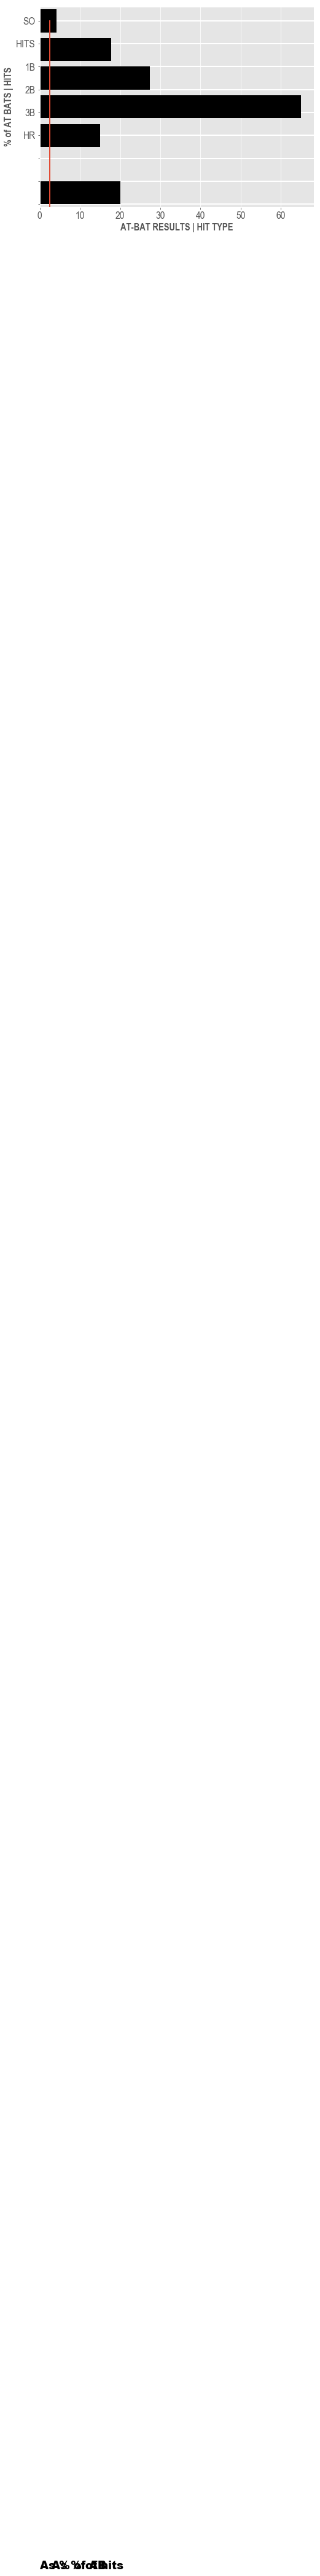

In [7]:
# bar plot
plt.figure()
my_dpi=150
plt.ylim(0, 100)
#sns.set_style( {'ytick.major.size': 0.0,'ytick.minor.size': 0.0} )
from matplotlib import ticker
tick_locator = ticker.MaxNLocator(10)
g = sns.barplot(
    x='hitperc',
    y='hits',
    data=df,
    color="black"
)

g.yaxis.set_major_locator(tick_locator)
g.grid(axis='y', linewidth=2)
g.figure.set_size_inches(8,6)
plt.plot([2.5, 2.5], [0, 100], linewidth=2)
# Add labels to the plot
style = dict(fontsize=18, family='Arial Black', color='black')
plt.text(0, 89, "As % of AB", **style)
plt.text(3, 89, "As % of hits", **style)
g.set_ylabel('% of AT BATS | HITS', fontsize=16, fontweight='bold')
g.set_xlabel('AT-BAT RESULTS | HIT TYPE', fontsize=16, fontweight='bold')

#g.figure.savefig('static/img/HR.png',bbox_inches='tight')


In [1]:
data = batting_stats(2018)

NameError: name 'batting_stats' is not defined

In [33]:
soxBS = pd.DataFrame( data.loc[ ( data["Team"] == "White Sox") ] )
soxBSselect = soxBS[['Name','AB','R','H','2B','3B','HR','RBI','BB','SO','SB','CS','AVG','OBP','SLG','wOBA','wRAA','RAR','WAR','Fld']]
soxBSselect = soxBSselect.copy()
soxBSselect.loc[:,'SOperc'] = np.round( (soxBSselect['SO'] / soxBSselect['AB'] )*100,1 )
soxBSselect['last'] = soxBSselect['Name'].str.split(' ').str[1]
soxBSselect.loc[:, 'AB'] = soxBSselect['AB'].astype(int)
soxBSselect.loc[:, 'R'] = soxBSselect['R'].astype(int)
soxBSselect.loc[:, 'H'] = soxBSselect['H'].astype(int)
soxBSselect.loc[:, '2B'] = soxBSselect['2B'].astype(int)
soxBSselect.loc[:, '3B'] = soxBSselect['3B'].astype(int)
soxBSselect.loc[:, 'HR'] = soxBSselect['HR'].astype(int)
soxBSselect.loc[:, 'RBI'] = soxBSselect['RBI'].astype(int)
soxBSselect.loc[:, 'BB'] = soxBSselect['BB'].astype(int)
soxBSselect.loc[:, 'SO'] = soxBSselect['SO'].astype(int)
soxBSselect.loc[:, 'CS'] = soxBSselect['CS'].astype(int)
soxBSselect = soxBSselect.rename(columns = {'2B':'dbls','3B':'trps' })
soxBSselect.to_csv("csv/soxhit.csv", index=False, encoding="utf-8")
print("Sox batting stats done")

,Name,AB,R,H,dbls,trps,HR,RBI,BB,SO,...,AVG,OBP,SLG,wOBA,wRAA,RAR,WAR,Fld,SOperc,last
134,Tim Anderson,45,8,12,1,0,3,4,4,16,...,0.267,0.327,0.489,0.356,1.7,4.9,0.5,-0.7,35.6,Anderson
58,Matt Davidson,38,10,8,1,0,5,10,9,16,...,0.211,0.375,0.632,0.427,4.3,4.1,0.4,NaN,42.1,Davidson
135,Yolmer Sanchez,38,3,11,1,2,1,9,2,9,...,0.289,0.341,0.500,0.356,1.5,4.0,0.4,1.5,23.7,Sanchez
280,Yoan Moncada,49,6,9,3,0,1,3,8,24,...,0.184,0.298,0.306,0.279,-1.5,3.1,0.3,1.1,49.0,Moncada
176,Leury Garcia,18,3,5,1,0,0,2,1,4,...,0.278,0.381,0.333,0.332,0.3,2.2,0.2,0.9,22.2,Garcia
117,Nick Delmonico,32,3,9,1,0,1,3,6,9,...,0.281,0.410,0.406,0.371,1.8,1.0,0.1,-1.2,28.1,Delmonico
131,Jose Abreu,48,6,12,2,0,3,6,2,9,...,0.250,0.333,0.479,0.358,2.0,1.1,0.1,-0.5,18.8,Abreu
293,Tyler Saladino,8,1,2,1,0,0,0,0,3,...,0.250,0.250,0.375,0.270,-0.3,0.7,0.1,0.8,37.5,Saladino
181,Welington Castillo,28,3,6,2,0,2,4,2,7,...,0.214,0.267,0.500,0.330,0.4,0.1,0.0,-1.0,25.0,Castillo
262,Omar Narvaez,16,0,3,2,0,0,1,3,3,...,0.188,0.316,0.313,0.290,-0.3,0.2,0.0,0.0,18.8,Narvaez


In [6]:
soxhit = pd.read_csv('csv/soxhit.csv', index_col=None)
soxroster = pd.read_csv('csv/soxroster.csv', index_col=None)
left = soxhit
right = soxroster
soxjoin = pd.merge(left, right, how='left', left_on='Name', right_on='posName', suffixes=('_x', '_y'))
soxjoin

,Name,AB,R,H,dbls,trps,HR,RBI,BB,SO,...,wOBA,wRAA,RAR,WAR,Fld,SOperc,last,posName,posnum,position
0,Tim Anderson,45,8,12,1,0,3,4,4,16,...,0.356,1.7,4.9,0.5,-0.7,35.6,Anderson,Tim Anderson,7,Short stop
1,Matt Davidson,38,10,8,1,0,5,10,9,16,...,0.427,4.3,4.1,0.4,NaN,42.1,Davidson,Matt Davidson,24,DH
2,Yolmer Sanchez,38,3,11,1,2,1,9,2,9,...,0.356,1.5,4.0,0.4,1.5,23.7,Sanchez,Yolmer Sanchez,5,Third base
3,Yoan Moncada,49,6,9,3,0,1,3,8,24,...,0.279,-1.5,3.1,0.3,1.1,49.0,Moncada,Yoan Moncada,10,Second base
4,Leury Garcia,18,3,5,1,0,0,2,1,4,...,0.332,0.3,2.2,0.2,0.9,22.2,Garcia,Leury Garcia,28,Outfield
5,Nick Delmonico,32,3,9,1,0,1,3,6,9,...,0.371,1.8,1.0,0.1,-1.2,28.1,Delmonico,Nick Delmonico,30,Outfield
6,Jose Abreu,48,6,12,2,0,3,6,2,9,...,0.358,2.0,1.1,0.1,-0.5,18.8,Abreu,Jose Abreu,79,First base
7,Tyler Saladino,8,1,2,1,0,0,0,0,3,...,0.270,-0.3,0.7,0.1,0.8,37.5,Saladino,Tyler Saladino,20,Infield
8,Welington Castillo,28,3,6,2,0,2,4,2,7,...,0.330,0.4,0.1,0.0,-1.0,25.0,Castillo,Welington Castillo,21,Catcher
9,Omar Narvaez,16,0,3,2,0,0,1,3,3,...,0.290,-0.3,0.2,0.0,0.0,18.8,Narvaez,Omar Narvaez,38,Catcher


(12, 27)

In [2]:
cubs = schedule_and_record(2018, 'CHC')

print('ready')

ready


In [4]:
cubs.head(15)

,Date,Tm,Home_Away,Opp,W/L,R,RA,Inn,W-L,Rank,GB,Win,Loss,Save,Time,D/N,Attendance,Streak,Orig. Scheduled
1,"Thursday, Mar 29",CHC,@,MIA,W,8.0,4.0,9.0,1-0,1.0,Tied,Cishek,Urena,None,3:18,D,32151.0,1.0,None
2,"Friday, Mar 30",CHC,@,MIA,L-wo,1.0,2.0,17.0,1-1,3.0,1.0,Despaigne,Butler,None,5:18,N,12034.0,-1.0,None
3,"Saturday, Mar 31",CHC,@,MIA,W,10.0,6.0,10.0,2-1,2.0,1.0,Strop,Ziegler,None,3:57,N,13422.0,1.0,None
4,"Sunday, Apr 1",CHC,@,MIA,L,0.0,6.0,9.0,2-2,3.0,1.5,Peters,Quintana,None,2:36,D,10428.0,-1.0,None
5,"Monday, Apr 2",CHC,@,CIN,L,0.0,1.0,9.0,2-3,4.0,2.5,Mahle,Chatwood,Iglesias,2:33,D,18963.0,-2.0,None
6,"Thursday, Apr 5",CHC,@,MIL,W,8.0,0.0,9.0,3-3,3.0,2.0,Lester,Suter,None,2:52,N,24310.0,1.0,None
7,"Friday, Apr 6",CHC,@,MIL,L-wo,4.0,5.0,9.0,3-4,3.0,3.0,Albers,Montgomery,None,3:45,N,37758.0,-1.0,None
8,"Saturday, Apr 7",CHC,@,MIL,W,5.0,2.0,9.0,4-4,3.0,2.0,Strop,Barnes,Morrow,3:26,D,43331.0,1.0,None
9,"Sunday, Apr 8",CHC,@,MIL,W,3.0,0.0,9.0,5-4,2.0,2.0,Quintana,Anderson,Morrow,2:41,D,39282.0,2.0,None
10,"Tuesday, Apr 10",CHC,Home,PIT,L,5.0,8.0,9.0,5-5,2.0,3.0,Nova,Chatwood,Vazquez,3:05,D,40144.0,-1.0,None


In [2]:
bballJoin = pd.read_csv('csv/bballJoin.csv', index_col=None)


In [3]:
print('Get Sox sched stuff')
sox = schedule_and_record(2018, 'CHW')
soxsort = pd.DataFrame ( sox.loc[ ( sox["W/L"].notnull() ) ] )
soxsort.sort_index(ascending=False,inplace=True)
soxlast = soxsort[:1]
soxnext = pd.DataFrame ( sox.loc[ ( sox["W/L"].isnull() ) ] )
soxnext = soxnext[:1]
soxlast = soxnext.append(soxlast)
soxlast = soxlast.rename(columns = {'Tm':'teamID'})
left = soxlast
right = bballJoin
soxnextlast = pd.merge(left, right, how='left', left_on='Opp', right_on='tres', suffixes=('_x', '_y'))
soxnextlast = soxnextlast.sort_values(by='R', ascending=False).reset_index(drop=True)
soxnextlast.to_csv("csv/soxnextlast.csv", index=False, encoding="utf-8")
print('Last and next sox games saved')
# Now aggregate results by team
# get df of teams played
soxteams = []
for name,grouped in soxsort.groupby(['Opp']):
    dlist = list([name])
    soxteams.append(dlist)
df = pd.DataFrame(data = soxteams, columns=['Team'])
# now aggregate results
soxlist = []
for team in df['Team']:
    # Link team in df to soxteams list in teamlist
    opp = soxsort['Opp'] == team
    df1 = soxsort[opp]
    # get wins and losses
    w = df1['W/L'] == 'W'
    wins = len( df1[w] )
    l = df1['W/L'] == 'L'
    loses = len( df1[l] )
    # average runs/against
    rAvg = np.round( df1['R'].mean() ,2)
    raAvg = np.round( df1['RA'].mean() ,2)
    # append to empty list
    slist = list([team,wins,loses,rAvg,raAvg])
    soxlist.append(slist)
# bring list into dataframe and name columns
soxagainst = pd.DataFrame(data = soxlist, columns=['teamID','Wins','Loses','AvgRuns','AvgRunsAg'])
# join aggregated list with team names
left = soxagainst
right = bballJoin
soxagg = pd.merge(left, right, how='left', left_on='teamID', right_on='tres', suffixes=('_x', '_y'))
soxagg.to_csv("csv/soxagg.csv", index=False, encoding="utf-8")
print("Sox aggregate done")

Get Sox sched stuff
Last and next sox games saved
Sox aggregate done


In [3]:
print('Get Sox sched stuff')
sox = schedule_and_record(2018, 'CHW')

Get Sox sched stuff


In [10]:
soxsort = pd.DataFrame ( sox.loc[ ( sox["W/L"].notnull() ) ] )
soxsort.sort_index(ascending=False,inplace=True)
soxlast = soxsort[:1]
soxlast = soxlast.copy()
soxlast.loc[:, 'R'] = soxlast['R'].astype(int)
soxlast.loc[:, 'R'] = soxlast['R'].astype(str)
soxlast.loc[:, 'RA'] = soxlast['RA'].astype(int)
soxlast.loc[:, 'RA'] = soxlast['RA'].astype(str)
soxlast.dtypes

Date                object
Tm                  object
Home_Away           object
Opp                 object
W/L                 object
R                   object
RA                  object
Inn                float64
W-L                 object
Rank               float64
GB                  object
Win                 object
Loss                object
Save                object
Time                object
D/N                 object
Attendance         float64
Streak             float64
Orig. Scheduled     object
dtype: object

In [11]:
soxlast.shape

(1, 19)

In [21]:
soxnext = pd.DataFrame ( sox.loc[ ( sox["W/L"].isnull() ) ] )
soxnext = soxnext[:1]
soxlast = soxnext.append(soxlast)
soxlast = soxlast.rename(columns = {'Tm':'teamID'})
left = soxlast
right = bballJoin
soxnextlast = pd.merge(left, right, how='left', left_on='Opp', right_on='tres', suffixes=('_x', '_y'))
soxnextlast = soxnextlast.sort_values(by='R', ascending=False).reset_index(drop=True)
soxnextlast.head()

,Date,teamID,Home_Away,Opp,W/L,R,RA,Inn,W-L,Rank,...,D/N,Attendance,Streak,Orig. Scheduled,Team,Tm,League,Division,color,tres
0,"Thursday, Apr 12",CHW,@,MIN,L,0,4,9.0,4-8,3.0,...,N,15474.0,-1.0,None,Twins,Minnesota Twins,American,Central,#6B8E23,MIN
1,"Sunday, Apr 15",CHW,@,MIN,None,NaN,NaN,NaN,None,NaN,...,None,NaN,NaN,None,Twins,Minnesota Twins,American,Central,#6B8E23,MIN


In [107]:
sox = schedule_and_record(2018, 'CHW')
soxsort = pd.DataFrame ( sox.loc[ ( sox["W/L"].notnull() ) ] )
soxsort.sort_index(ascending=False,inplace=True)
soxlast = soxsort[:1]
soxnext = pd.DataFrame ( sox.loc[ ( sox["W/L"].isnull() ) ] )
soxnext = soxnext[:1]
soxlast = soxnext.append(soxlast)
soxlast = soxlast.rename(columns = {'Tm':'teamID'})
left = soxlast
right = bballJoin
soxagg = pd.merge(left, right, how='left', left_on='Opp', right_on='tres', suffixes=('_x', '_y'))
soxagg = soxagg.sort_values(by='R', ascending=False).reset_index(drop=True)
soxagg

,Date,teamID,Home_Away,Opp,W/L,R,RA,Inn,W-L,Rank,...,D/N,Attendance,Streak,Orig. Scheduled,Team,Tm,League,Division,color,tres
0,"Thursday, Apr 12",CHW,@,MIN,L,0.0,4.0,9.0,4-8,3.0,...,N,15474.0,-1.0,None,Twins,Minnesota Twins,American,Central,#6B8E23,MIN
1,"Sunday, Apr 15",CHW,@,MIN,None,NaN,NaN,NaN,None,NaN,...,None,NaN,NaN,None,Twins,Minnesota Twins,American,Central,#6B8E23,MIN


In [109]:
# get df of teams
soxteams = []
for name,grouped in soxsort.groupby(['Opp']):
    dlist = list([name])
    soxteams.append(dlist)
df = pd.DataFrame(data = soxteams, columns=['Team'])
df

,Team
0,DET
1,KCR
2,MIN
3,TBR
4,TOR


In [78]:
# now aggregate results

# create empty list
soxlist = []
for team in df['Team']:
    # Link team in df to soxteams list in teamlist
    opp = sox['Opp'] == team
    df1 = sox[opp]
    
    # get wins and losses
    w = df1['W/L'] == 'W'
    wins = len( df1[w] )
    l = df1['W/L'] == 'L'
    loses = len( df1[l] )
    
    # average runs/against
    rAvg = np.round( df1['R'].mean() ,2)
    raAvg = np.round( df1['RA'].mean() ,2)
    
    slist = list([team,wins,loses,rAvg,raAvg])
    soxlist.append(slist)
soxagainst = pd.DataFrame(data = soxlist, columns=['teamID','Wins','Loses','AvgRuns','AvgRunsAg'])
soxagainst

,teamID,Wins,Loses,AvgRuns,AvgRunsAg
0,DET,0,3,2.67,5.33
1,KCR,2,0,9.00,5.00
2,MIN,0,1,0.00,4.00
3,TBR,1,2,3.67,4.00
4,TOR,1,2,3.67,7.00


In [79]:
left = soxagainst
right = bballJoin
soxagg = pd.merge(left, right, how='left', left_on='teamID', right_on='tres', suffixes=('_x', '_y'))
soxagg

,teamID,Wins,Loses,AvgRuns,AvgRunsAg,Team,Tm,League,Division,color,tres
0,DET,0,3,2.67,5.33,Tigers,Detroit Tigers,American,Central,#6B8E23,DET
1,KCR,2,0,9.00,5.00,Royals,Kansas City Royals,American,Central,#6B8E23,KCR
2,MIN,0,1,0.00,4.00,Twins,Minnesota Twins,American,Central,#6B8E23,MIN
3,TBR,1,2,3.67,4.00,Rays,Tampa Bay Rays,American,East,#6B8E23,TBR
4,TOR,1,2,3.67,7.00,Blue Jays,Toronto Blue Jays,American,East,#6B8E23,TOR


In [9]:
sox.dtypes

Date                object
Tm                  object
Home_Away           object
Opp                 object
W/L                 object
R                  float64
RA                 float64
Inn                float64
W-L                 object
Rank               float64
GB                  object
Win                 object
Loss                object
Save                object
Time                object
D/N                 object
Attendance         float64
Streak             float64
Orig. Scheduled     object
dtype: object

In [10]:
sox.shape

(12, 19)

In [22]:
sox[:1]
#soxlast=pd.DataFrame( sox.iloc[0] )
#soxlast

,Date,Tm,Home_Away,Opp,W/L,R,RA,Inn,W-L,Rank,GB,Win,Loss,Save,Time,D/N,Attendance,Streak,Orig. Scheduled
12,"Thursday, Apr 12",CHW,@,MIN,L,0.0,4.0,9.0,4-8,3.0,3.5,Berrios,Giolito,None,2:55,N,15474.0,-1.0,None
